**Problem : Unstack Uneven Rows into Separate Columns**

**INPUT** 

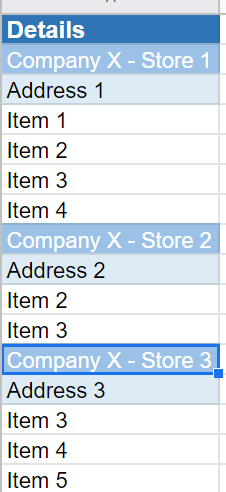


**OUTPUT**

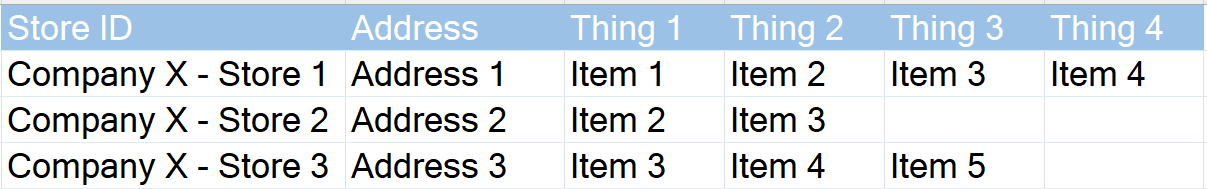

In [1]:
from google.colab import drive
drive.mount('/content/drive')
source = "/content/drive/MyDrive/Colab Notebooks/reader.xlsx"

Mounted at /content/drive


In [2]:
import pandas as pd

#create address list 1 in form of df1
data1 = pd.read_excel (source, sheet_name='Sheet3')
df1= pd.DataFrame(data1, dtype=str)

In [37]:
df1.info()
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Details  15 non-null     object
dtypes: object(1)
memory usage: 248.0+ bytes


,Details
0,Company X - Store 1
1,Address 1
2,Item 1
3,Item 2
4,Item 3
5,Item 4
6,Company X - Store 2
7,Address 2
8,Item 2
9,Item 3


In [39]:
# create an empty dataframe with 6 columns and 10 rows  
df2= pd.DataFrame(columns=['Store ID','Address','Thing 1','Thing 2','Thing 3','Thing 4'],index = range (10))
print(df2.shape)
len(df1)

(10, 6)


15

In [40]:
#find indices which match criteria

condition = df1['Details'].str.contains('Company X')
matched_indices = df1.index[condition]
matched_indices_list = matched_indices.tolist()
matched_indices_list
#matched_indices_list2=matched_indices_list[0:4]

[0, 6, 10]

In [41]:
for i in range (0, len(matched_indices_list)):
  start = matched_indices_list[i]
  if (i == len(matched_indices_list)-1): #possibility of end of array
    stop = len(df1)
  else:
    stop = matched_indices_list[i+1] 
  print( "i =", i, "start =", start, "stop =", stop)
  col_incr = 0 
  for j in range(start, stop):
    print(j, df1['Details'][j])
    col_incr = j - start
    df2.iloc[i,col_incr] = df1['Details'][j] # df2.iloc[i,k] = df1.iloc[pos,k-7]

i = 0 start = 0 stop = 6
0 Company X - Store 1
1 Address 1
2 Item 1
3 Item 2
4 Item 3
5 Item 4
i = 1 start = 6 stop = 10
6 Company X - Store 2
7 Address 2
8 Item 2
9 Item 3
i = 2 start = 10 stop = 15
10 Company X - Store 3
11 Address 3
12 Item 3
13 Item 4
14 Item 5


In [42]:
df2

,Store ID,Address,Thing 1,Thing 2,Thing 3,Thing 4
0,Company X - Store 1,Address 1,Item 1,Item 2,Item 3,Item 4
1,Company X - Store 2,Address 2,Item 2,Item 3,NaN,NaN
2,Company X - Store 3,Address 3,Item 3,Item 4,Item 5,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
destination = "/content/drive/MyDrive/Colab Notebooks/final.xlsx"  
# saving the excel
df2.to_excel(destination)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [ ]:
for i in range(0,10):
  for j in range(0,4):
    df2.iloc[i,j]

print(df2)